# Clustering
Casual inference btw holidays and transactions – first at a high level, seeing if there are spikes or dips in sales around an event/holiday - narrow it down to determine fi there are specific families of items whos sales changed around those dates  

^ for one of the use cases, add oil price as a feature (for UC2,UC3 I think it’s the most doable) 

 
# Causal ML
Clustering stores, mostly based on product-share categories (which stores are similar in terms of the types of products they sell) 

Interpret clusters to advise consumers in which store they will find what they need, or also to know which kind of “branding/profile” give to each store. 

Can we account for perishable? 


did we have a google doc?

# Clustering with DBSCAN

references: http://www.sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/ 

In [74]:
# import statements
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score 
import numpy as np
from sklearn.preprocessing import StandardScaler

In [75]:
# load clustering dataset
stores = pd.read_csv("/Users/tehuttesfayebiru/Desktop/MCGILL/Program/Winter term/INSY 695/W1_Project/clustering_df.csv")
stores.head()

,Unnamed: 0,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,EGGS,...,HOME CARE,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions
0,0,1,0.000000,18.902748,0.001492,4.029323,7.624483,7.453233,1.463511,1.671829,...,1.203477,0.112006,0.107227,1.202565,3.729644,2.034742,1.537917,3.383659,17.271545,2553963
1,1,2,0.000389,19.260932,0.001108,4.285650,7.539144,6.662193,1.907932,1.459312,...,1.386907,0.137011,0.064282,0.675594,3.940995,1.824219,2.059788,3.799749,12.898353,3219901
2,2,3,0.001331,22.487688,0.001070,3.837526,6.882394,6.807689,1.316565,1.743038,...,1.082094,0.103020,0.081837,0.732337,2.706705,2.250986,1.679733,3.773844,17.061038,5366350
3,3,4,0.000127,19.400316,0.001407,3.611438,7.878741,7.028889,1.923636,1.532204,...,1.369247,0.135344,0.083385,0.740429,3.291591,1.683853,2.030527,3.997834,13.958046,2519007
4,4,5,0.001379,16.251393,0.001475,4.122759,10.695893,5.587790,2.663210,1.223963,...,1.534573,0.095037,0.031874,0.708336,3.059760,2.145725,2.887050,2.691282,10.604885,2347877


In [76]:
stores = stores.iloc[:,1:]
stores.head()

,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,...,HOME CARE,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions
0,1,0.000000,18.902748,0.001492,4.029323,7.624483,7.453233,1.463511,1.671829,1.540569,...,1.203477,0.112006,0.107227,1.202565,3.729644,2.034742,1.537917,3.383659,17.271545,2553963
1,2,0.000389,19.260932,0.001108,4.285650,7.539144,6.662193,1.907932,1.459312,1.254980,...,1.386907,0.137011,0.064282,0.675594,3.940995,1.824219,2.059788,3.799749,12.898353,3219901
2,3,0.001331,22.487688,0.001070,3.837526,6.882394,6.807689,1.316565,1.743038,1.498906,...,1.082094,0.103020,0.081837,0.732337,2.706705,2.250986,1.679733,3.773844,17.061038,5366350
3,4,0.000127,19.400316,0.001407,3.611438,7.878741,7.028889,1.923636,1.532204,1.341576,...,1.369247,0.135344,0.083385,0.740429,3.291591,1.683853,2.030527,3.997834,13.958046,2519007
4,5,0.001379,16.251393,0.001475,4.122759,10.695893,5.587790,2.663210,1.223963,1.729505,...,1.534573,0.095037,0.031874,0.708336,3.059760,2.145725,2.887050,2.691282,10.604885,2347877


In [29]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_nbr         54 non-null     int64  
 1   BABY CARE         54 non-null     float64
 2   BEVERAGES         54 non-null     float64
 3   BOOKS             54 non-null     float64
 4   BREAD/BAKERY      54 non-null     float64
 5   CLEANING          54 non-null     float64
 6   DAIRY             54 non-null     float64
 7   DELI              54 non-null     float64
 8   EGGS              54 non-null     float64
 9   FROZEN FOODS      54 non-null     float64
 10  GROCERIES         54 non-null     float64
 11  HOME CARE         54 non-null     float64
 12  LADIESWEAR        54 non-null     float64
 13  LAWN AND GARDEN   54 non-null     float64
 14  LIQUOR,WINE,BEER  54 non-null     float64
 15  MEATS             54 non-null     float64
 16  OTHER             54 non-null     float64
 17 

In [30]:
stores.describe()

,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,...,HOME CARE,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions
count,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,...,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,54.000000,5.400000e+01
mean,27.500000,0.001389,20.015929,0.000468,3.893314,9.768832,5.642358,2.384766,1.494563,1.219267,...,1.608747,0.053469,0.048890,0.760918,2.713879,1.557620,2.410312,2.585521,10.244290,2.619980e+06
std,15.732133,0.002253,2.816319,0.000648,1.162094,2.417229,1.307135,0.800759,0.702811,0.442499,...,0.383285,0.046230,0.056899,0.418920,1.413092,0.399033,0.584714,0.994313,5.255726,1.596024e+06
min,1.000000,0.000000,14.246003,0.000000,1.991028,6.523587,2.742364,1.055825,0.556189,0.514739,...,0.939695,0.000000,0.000000,0.213133,0.793148,0.883098,1.332629,0.803791,1.895932,2.753930e+05
25%,14.250000,0.000102,17.762812,0.000000,3.273396,7.699165,4.617295,1.813752,0.990098,0.801818,...,1.327939,0.013211,0.001176,0.524908,1.817530,1.271038,1.926362,1.779623,6.162416,1.533398e+06
50%,27.500000,0.000464,20.514291,0.000000,3.708900,9.483487,5.601836,2.310537,1.312826,1.283665,...,1.611246,0.046061,0.031065,0.704328,2.481708,1.559187,2.440383,2.489980,9.553421,2.248874e+06
75%,40.750000,0.001529,21.233741,0.000932,4.410268,10.972298,6.785729,2.726217,1.754609,1.550056,...,1.811440,0.081628,0.080453,0.903156,3.270905,1.857851,2.823591,3.386024,13.723174,3.181400e+06
max,54.000000,0.013797,30.537829,0.003387,8.365665,16.144062,7.784193,4.364501,3.777214,2.525750,...,2.612566,0.155536,0.285812,2.583184,9.450283,2.410150,4.061814,4.324495,21.554856,7.273093e+06


In [90]:
plotting = stores.iloc[:, 1:18]
plotting.head()

,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,GROCERIES,HOME CARE,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE
0,-0.622409,-0.398972,1.595005,0.118137,-0.895441,1.398386,-1.161279,0.254594,0.732927,-1.310256,-1.067290,1.278086,1.034899,1.064152,0.725574,1.206922,-1.506010
1,-0.447884,-0.270596,0.997756,0.340781,-0.931076,0.787532,-0.601069,-0.050627,0.081464,-0.525597,-0.584221,1.824062,0.273043,-0.205589,0.876545,0.674386,-0.605107
2,-0.025949,0.885897,0.937727,-0.048457,-1.205323,0.899887,-1.346511,0.356865,0.637888,-1.458703,-1.386953,1.081883,0.584481,-0.068866,-0.005124,1.753930,-1.261195
3,-0.565540,-0.220640,1.462681,-0.244836,-0.789267,1.070701,-0.581274,0.054062,0.279000,-0.687828,-0.630730,1.787660,0.611939,-0.049366,0.412667,0.319317,-0.655621
4,-0.004547,-1.349238,1.569313,0.199295,0.387123,-0.042138,0.350990,-0.388640,1.163910,0.070355,-0.195340,0.907590,-0.301881,-0.126695,0.247067,1.487662,0.822991


<AxesSubplot:>

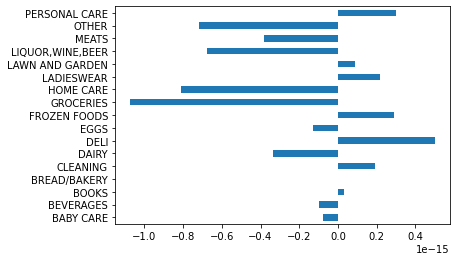

In [91]:
plotting.mean().plot(kind="barh")

## Selecting hyper parameters eps and min_samples

### Parameter Min_samples
MinPts: As a rule of thumb, a minimum minPts can be derived from the number of dimensions D in the data set, as minPts ≥ D + 1.

As a rule of thumb, minPts = 2·dim can be used, but it may be necessary to choose larger values for very large data, for noisy data or for data that contains many duplicates.

- The larger the data set, the larger the value of MinPts should be
- If the data set is noisier, choose a larger value of MinPts
- Generally, MinPts should be greater than or equal to the dimensionality of the data set
- For 2-dimensional data, use DBSCAN’s default value of MinPts = 4 (Ester et al., 1996).
- If your data has more than 2 dimensions, choose MinPts = 2*dim, where dim= the dimensions of your data set (Sander et al., 1998).


In [52]:
len(list(stores.columns))

21

Since we have a dataset with size 21 features, we initially select 42 as our min_samples value as a starting point

### Parameter eps

ε: The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value.


In [77]:
stores.columns

Index(['store_nbr', 'BABY CARE', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERIES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEATS', 'OTHER', 'PERSONAL CARE', 'POULTRY', 'PRODUCE',
       'transactions'],
      dtype='object')

In [78]:
stores[['BABY CARE', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERIES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEATS', 'OTHER', 'PERSONAL CARE', 'POULTRY', 'PRODUCE',
       'transactions']] = StandardScaler().fit_transform(stores[['BABY CARE', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERIES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEATS', 'OTHER', 'PERSONAL CARE', 'POULTRY', 'PRODUCE',
       'transactions']])

In [79]:
stores.describe()

,store_nbr,BABY CARE,BEVERAGES,BOOKS,BREAD/BAKERY,CLEANING,DAIRY,DELI,EGGS,FROZEN FOODS,...,HOME CARE,LADIESWEAR,LAWN AND GARDEN,"LIQUOR,WINE,BEER",MEATS,OTHER,PERSONAL CARE,POULTRY,PRODUCE,transactions
count,54.000000,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,...,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01,5.400000e+01
mean,27.500000,-7.607084e-17,-9.971448e-17,3.289550e-17,2.055969e-18,1.891491e-16,-3.371788e-16,4.996004e-16,-1.315820e-16,2.919475e-16,...,-8.100516e-16,2.179327e-16,8.840665e-17,-6.743577e-16,-3.824102e-16,-7.190750e-16,3.001714e-16,-2.878356e-17,5.119362e-16,-1.192462e-16
std,15.732133,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,...,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00,1.009390e+00
min,1.000000,-6.224087e-01,-2.067985e+00,-7.285776e-01,-1.652318e+00,-1.355154e+00,-2.239420e+00,-1.675185e+00,-1.347709e+00,-1.607110e+00,...,-1.761966e+00,-1.167458e+00,-8.673209e-01,-1.319891e+00,-1.372003e+00,-1.706262e+00,-1.860398e+00,-1.808746e+00,-1.603346e+00,-1.482812e+00
25%,14.250000,-5.768805e-01,-8.075340e-01,-7.285776e-01,-5.384579e-01,-8.642548e-01,-7.915691e-01,-7.197872e-01,-7.245207e-01,-9.522497e-01,...,-7.395150e-01,-8.789992e-01,-8.464539e-01,-5.686675e-01,-6.402737e-01,-7.249348e-01,-8.354400e-01,-8.181182e-01,-7.839453e-01,-6.871990e-01
50%,27.500000,-4.146146e-01,1.786167e-01,-7.285776e-01,-1.601814e-01,-1.191551e-01,-3.129117e-02,-9.356927e-02,-2.610130e-01,1.468983e-01,...,6.579099e-03,-1.617484e-01,-3.162210e-01,-1.363529e-01,-1.658427e-01,3.964276e-03,5.191196e-02,-9.698938e-02,-1.326850e-01,-2.347027e-01
75%,40.750000,6.260724e-02,4.364731e-01,7.238531e-01,4.490238e-01,5.025448e-01,8.829287e-01,4.304132e-01,3.734842e-01,7.545676e-01,...,5.337944e-01,6.148091e-01,5.599208e-01,3.427255e-01,3.978909e-01,7.594604e-01,7.134417e-01,8.126417e-01,6.681381e-01,3.550643e-01
max,54.000000,5.559910e+00,3.771128e+00,4.547686e+00,3.884665e+00,2.662177e+00,1.653958e+00,2.495537e+00,3.278387e+00,2.980236e+00,...,2.643578e+00,2.228537e+00,4.203007e+00,4.390766e+00,4.811902e+00,2.156548e+00,2.850981e+00,1.765343e+00,2.172254e+00,2.942817e+00


In [89]:
stores.columns

Index(['store_nbr', 'BABY CARE', 'BEVERAGES', 'BOOKS', 'BREAD/BAKERY',
       'CLEANING', 'DAIRY', 'DELI', 'EGGS', 'FROZEN FOODS', 'GROCERIES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LIQUOR,WINE,BEER',
       'MEATS', 'OTHER', 'PERSONAL CARE', 'POULTRY', 'PRODUCE',
       'transactions'],
      dtype='object')

In [153]:
db_stores = stores[["CLEANING", "PRODUCE", "GROCERIES",'POULTRY', 'DAIRY']]
db_stores

,CLEANING,PRODUCE,GROCERIES,POULTRY,DAIRY
0,-0.895441,1.349621,-1.310256,0.810241,1.398386
1,-0.931076,0.509727,-0.525597,1.232640,0.787532
2,-1.205323,1.309192,-1.458703,1.206343,0.899887
3,-0.789267,0.713246,-0.687828,1.433729,1.070701
4,0.387123,0.069254,0.070355,0.107365,-0.042138
5,-0.628505,0.239005,-0.450570,1.659146,0.585772
6,-1.336000,2.005926,-1.939637,1.211480,1.553824
7,-1.170642,1.277203,-1.417633,0.731152,1.653958
8,0.504775,-0.780720,1.084659,0.507260,-0.685095
9,1.609881,-1.466587,1.791715,0.489678,-0.963086


In [156]:
# Calculate the average distance between each point in the data set and its 40 nearest neighbors (selected MinPts/min_samples value).
# use min_samples for n_neighbors 
neighbors = NearestNeighbors(n_neighbors=3)
neighbors_fit = neighbors.fit(db_stores)
distances, indices = neighbors_fit.kneighbors(db_stores)

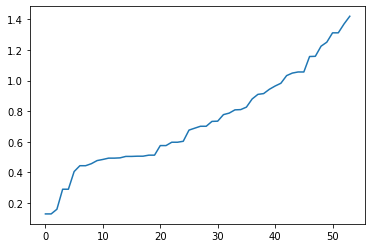

In [157]:
# Sort distance values by ascending value and plot
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [36]:
type(distances)

numpy.ndarray

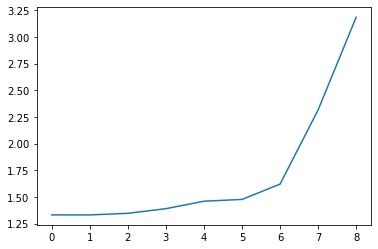

In [134]:
zoomed = distances[45:]
plt.plot(zoomed)


In [136]:
# see avg distance values for items after index 15
zoomed[5:]

array([1.47663271, 1.62024729, 2.31612688, 3.18579832])

In [84]:
#zoomed[5]

=> Select eps value 2.43 based on plots above (highest curvature point)

Looping through combinations of MinPts and ε values slightly above and below the values estimated here to find the model of best fit.


In [22]:
sil_scores = pd.DataFrame(columns=["eps", "min_samples", "silhouette_score"])
sil_scores

,eps,min_samples,silhouette_score


In [139]:
dbscan = DBSCAN(eps=1.6, min_samples=4)
labels = dbscan.fit_predict(db_stores)
labels

array([ 0,  0,  0,  0,  1,  0,  0,  0,  1,  1, -1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  0,  0,  0,  0,  0,  0,  1,  0,
       -1,  1,  1])

In [105]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4])

In [45]:
np.unique(yhat.labels_)
#np.unique(yhat)

AttributeError: 'numpy.ndarray' object has no attribute 'labels_'

In [140]:
# trying values slightly above and below 2*number of dimensions
for n in [2,3,4,5,6]:
    print("n", n)
    # trying eps values around elbow of curve plotted (average distances before & after selected)
    for e in [1.47663271, 1.62024729, 2.31612688]:
        print("e", e)
        model = DBSCAN(eps=e, min_samples=n)
        yhat = model.fit_predict(db_stores)
        #print(len(yhat))
        if len(np.unique(yhat)) > 1:
            print("in statement")
            # Calculate cluster validation metrics
            score_dbsacn_s = silhouette_score(db_stores, yhat, metric='euclidean')
            df = {'eps': e, 'min_samples': n, 'silhouette_score': score_dbsacn_s}
            sil_scores = sil_scores.append(df, ignore_index = True)
        
sil_scores

n 2
e 1.47663271
in statement
e 1.62024729
in statement
e 2.31612688
in statement
n 3
e 1.47663271
in statement
e 1.62024729
in statement
e 2.31612688
in statement
n 4
e 1.47663271
in statement
e 1.62024729
in statement
e 2.31612688
in statement
n 5
e 1.47663271
in statement
e 1.62024729
in statement
e 2.31612688
in statement
n 6
e 1.47663271
in statement
e 1.62024729
in statement
e 2.31612688
in statement


,eps,min_samples,silhouette_score
0,2.267302,2.0,0.246097
1,2.542719,2.0,-0.004144
2,2.267302,3.0,0.233852
3,2.542719,3.0,-0.004144
4,2.267302,4.0,0.205366
5,2.542719,4.0,0.301669
6,2.267302,5.0,-0.190235
7,2.542719,5.0,0.164039
8,1.476633,2.0,0.295657
9,1.620247,2.0,0.351102


In [141]:
sil_scores.sort_values(by="silhouette_score", ascending=False)

,eps,min_samples,silhouette_score
22,2.316127,6.0,0.361992
19,2.316127,5.0,0.361992
16,2.316127,4.0,0.361992
10,2.316127,2.0,0.361992
13,2.316127,3.0,0.361992
15,1.620247,4.0,0.360903
9,1.620247,2.0,0.351102
12,1.620247,3.0,0.351102
14,1.476633,4.0,0.347292
17,1.476633,5.0,0.347292


### Applying final model

In [ ]:
points_of_cluster_0 = dist[labels==0,:]
centroid_of_cluster_0 = np.mean(points_of_cluster_0, axis=0) 
print(centroid_of_cluster_0)

points_of_cluster_1 = dist[labels==1,:]
centroid_of_cluster_1 = np.mean(points_of_cluster_1, axis=0)
print(centroid_of_cluster_1)

In [149]:
# initialize DBSCAN with chosen hyperparameter values
dbscan = DBSCAN(eps=1.620247, min_samples=6)
labels = dbscan.fit_predict(db_stores)

db_stores["cluster_label"] = labels

db_stores
# visualize clustering results

#pyplot.scatter(df['x0'], df['x1'], c=labels, cmap='rainbow') 

<ipython-input-149-0b6e3fef96b7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_stores["cluster_label"] = labels


,CLEANING,PRODUCE,GROCERIES,MEATS,POULTRY,DAIRY,cluster_label
0,-0.895441,1.349621,-1.310256,0.725574,0.810241,1.398386,0
1,-0.931076,0.509727,-0.525597,0.876545,1.232640,0.787532,0
2,-1.205323,1.309192,-1.458703,-0.005124,1.206343,0.899887,0
3,-0.789267,0.713246,-0.687828,0.412667,1.433729,1.070701,0
4,0.387123,0.069254,0.070355,0.247067,0.107365,-0.042138,1
5,-0.628505,0.239005,-0.450570,0.427273,1.659146,0.585772,0
6,-1.336000,2.005926,-1.939637,0.393437,1.211480,1.553824,0
7,-1.170642,1.277203,-1.417633,0.109870,0.731152,1.653958,0
8,0.504775,-0.780720,1.084659,-0.221811,0.507260,-0.685095,1
9,1.609881,-1.466587,1.791715,0.399376,0.489678,-0.963086,1


In [143]:
db_stores.sort_values(by="cluster_label", ascending=False)

,CLEANING,PRODUCE,GROCERIES,MEATS,POULTRY,DAIRY,cluster_label
0,-0.895441,1.349621,-1.310256,0.725574,0.810241,1.398386,0
40,-0.017889,0.532813,-0.133489,-0.559564,-0.821642,0.456158,0
29,0.495854,-0.600259,0.368559,-0.998109,-0.335249,-0.435819,0
30,0.867093,-0.498615,0.710615,0.128173,-1.297806,-0.048716,0
31,1.241482,-1.328692,1.558234,-0.733691,-0.807545,-1.222546,0
32,1.205308,-0.140670,0.544811,0.196265,-0.076105,-0.827060,0
33,-0.316731,-1.084356,0.739015,-0.641672,-1.220983,-0.020444,0
34,0.266206,-1.049690,0.870469,0.587516,-1.370799,-1.677786,0
35,-0.341203,-0.124700,0.297554,-0.450464,-1.359191,-0.167029,0
36,-0.369325,0.990523,-0.473667,-0.436664,-0.533959,1.405531,0


In [150]:
np.unique(labels)

array([-1,  0,  1])

In [ ]:
db_stores[["CLEANING", "PRODUCE", "GROCERIES"]] = StandardScaler().inverse_transform(db_stores[["CLEANING", "PRODUCE", "GROCERIES"]])